#### LIBRERÍAS Y DATASET

In [24]:
%pip install tabulate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, expon, poisson, norm, gamma
from tabulate import tabulate

#Cargar los datos desde el repositorio de GitHub
#url = 'https://raw.githubusercontent.com/DCajiao/Distribuciones-de-Probabilidad/main/data/Web_Server_Requests_G.csv'
#df = pd.read_csv(url)
df = pd.read_csv("data/Web_Server_Requests_G.csv")

----

#### PREGUNTA 1

Considere las siguientes variables aleatorias  
1. $X ∼ b(x; n, p)$. Seleccione valores para $n, p$.
2. $Y ∼ exp(x; λ)$. Seleccione un valor para  $λ$.
        
Para cada variable aleatoria genere una muestra aleatoria de tamaño 150 y realizar el siguiente procedimiento:
        
1.  Construir, según el caso, un histograma de masa o densidad y, en un mismo
        gráfico, compararlo con la función de probabilidad teórica.
2.  Calcular el promedio, los cuartiles y la desviación estándar. Comparar los
        valores obtenidos con los valores teóricos.

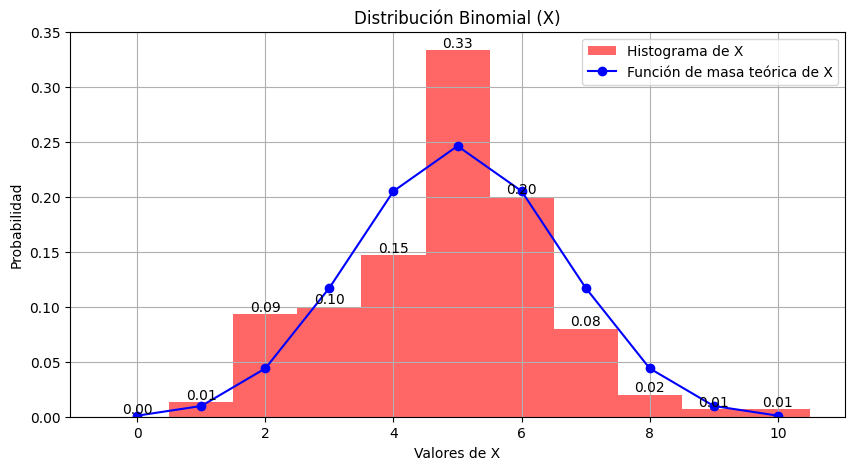

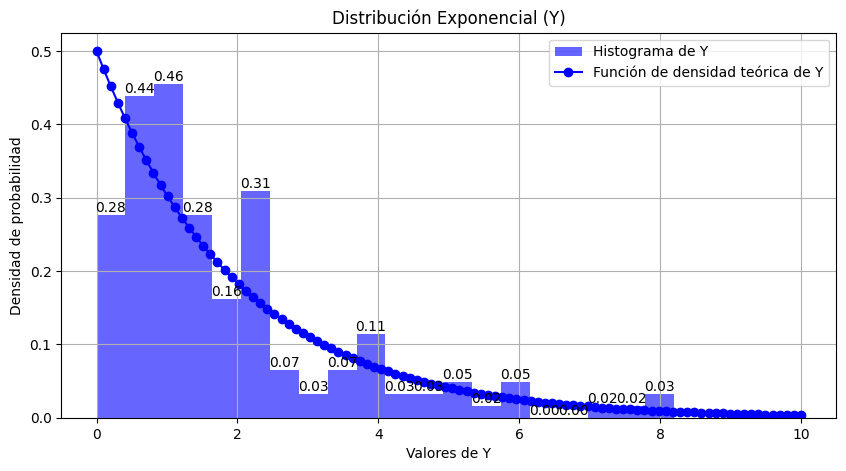

+------------------------------------+---------+
| Estadísticas descriptivas para X   |   Valor |
+====================================+=========+
| Promedio                           | 5.04    |
+------------------------------------+---------+
| Cuartil 1                          | 4       |
+------------------------------------+---------+
| Cuartil 2 (Mediana)                | 5       |
+------------------------------------+---------+
| Cuartil 3                          | 6       |
+------------------------------------+---------+
| Desviación estándar                | 1.68079 |
+------------------------------------+---------+


+------------------------------------+---------+
| Estadísticas descriptivas para Y   |   Valor |
+====================================+=========+
| Promedio                           | 1.87157 |
+------------------------------------+---------+
| Cuartil 1                          | 0.53427 |
+------------------------------------+---------+
| Cuartil 2 (Media

In [25]:

def distribucion_binomial_histograma(n, p, sample_size=150):
    """
    Genera un histograma y la función de masa de probabilidad teórica para una distribución binomial.

    Parámetros:
    n (int): El número de ensayos.
    p (float): La probabilidad de éxito en cada ensayo.
    sample_size (int, opcional): El tamaño de la muestra aleatoria. Por defecto es 150.

    """
    # Generar muestras aleatorias para X (distribución binomial)
    X_samples = np.random.binomial(n, p, sample_size)

    # Histograma y función de masa de X
    plt.figure(figsize=(10, 5))
    plt.hist(X_samples, bins=np.arange(n+2)-0.5, density=True, alpha=0.6, label='Histograma de X', color='red')
    x_values = np.arange(0, n+1)
    plt.plot(x_values, binom.pmf(x_values, n, p), 'bo-', label='Función de masa teórica de X')
    plt.xlabel('Valores de X')
    plt.ylabel('Probabilidad')
    plt.title('Distribución Binomial (X)')
    plt.legend()
        
    # Agregar valores de las barras
    for i, rect in enumerate(plt.gca().patches):
        plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), '{:.2f}'.format(rect.get_height()), ha='center', va='bottom', color='black')
    
    plt.grid(True)
    plt.show()

def distribucion_exponencial_histograma(lambda_param, sample_size=150):
    """
    Genera un histograma y la función de densidad de probabilidad teórica para una distribución exponencial.

    Parámetros:
    lambda_param (float): Parámetro de tasa lambda de la distribución exponencial.
    sample_size (int, opcional): El tamaño de la muestra aleatoria. Por defecto es 150.

    """
    # Generar muestras aleatorias para Y (distribución exponencial)
    Y_samples = np.random.exponential(scale=1/lambda_param, size=sample_size)

    # Histograma y función de densidad de Y
    plt.figure(figsize=(10, 5))
    plt.hist(Y_samples, bins=20, density=True, alpha=0.6, label='Histograma de Y', color='blue')
    y_values = np.linspace(0, 10, 100)
    plt.plot(y_values, expon.pdf(y_values, scale=1/lambda_param), 'bo-', label='Función de densidad teórica de Y')
    plt.xlabel('Valores de Y')
    plt.ylabel('Densidad de probabilidad')
    plt.title('Distribución Exponencial (Y)')
    plt.legend()
    
    # Agregar valores de las barras
    for i, rect in enumerate(plt.gca().patches):
        plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), '{:.2f}'.format(rect.get_height()), ha='center', va='bottom', color='black')

    plt.grid(True)
    plt.show()

def estadisticas_descriptivas(muestras, nombre):
    """
    Calcula estadísticas descriptivas para las muestras.

    Parámetros:
    muestras (array): Array de muestras para calcular las estadísticas descriptivas.
    nombre (str, opcional): El nombre de la distribución. Por defecto es "X".

    """
    mean = np.mean(muestras)
    q1, q2, q3 = np.percentile(muestras, [25, 50, 75])
    std = np.std(muestras)

    # Organizar los datos en una lista de listas para tabulate
    data = [
        ["Promedio", mean],
        ["Cuartil 1", q1],
        ["Cuartil 2 (Mediana)", q2],
        ["Cuartil 3", q3],
        ["Desviación estándar", std]
    ]

    # Crear la tabla
    table = tabulate(data, headers=[f"Estadísticas descriptivas para {nombre}", "Valor"], tablefmt="grid")

    return table

# Parámetros para la distribución binomial
n = 10  # Valor para n
p = 0.5  # Valor para p

# Función Binomial
distribucion_binomial_histograma(n, p)

# Parámetro para la distribución exponencial
lambda_param = 0.5  # Valor para lambda

# Función Exponencial
distribucion_exponencial_histograma(lambda_param)

# Calcular estadísticas descriptivas para X
X_samples = np.random.binomial(n, p, 150)
tabla = estadisticas_descriptivas(X_samples, "X")
print(tabla)
print("\n")

# Calcular estadísticas descriptivas para Y
Y_samples = np.random.exponential(scale=1/lambda_param, size=150)
tabla =estadisticas_descriptivas(Y_samples, "Y")
print(tabla)

----

#### PREGUNTA 2

Suponga un sistema de procesamiento de imágenes utilizado en un proyecto de inteligencia artificial para el reconocimiento de objetos en videos de vigilancia. Este sistema recibe continuamente flujos de imágenes de múltiples cámaras de seguridad. La tasa de llegada de imágenes por minuto sigue una distribución de Poisson con una tasa promedio de 5 imágenes por minuto. La precisión del reconocimiento de objetos depende en gran medida de la cantidad de imágenes procesadas por minuto. 
1.  ¿Cuál es la probabilidad de que el sistema de procesamiento de imágenes reciba exactamente 10 imágenes en el próximo minuto?
2.  ¿Cuál es la probabilidad de que el sistema de procesamiento de imágenes reciba una imagen en el próximo minuto?
3.  ¿Cuál es la probabilidad de que el sistema de procesamiento de imágenes reciba al menos 30 imágenes en los próximos 5 minutos?
4.  Si el sistema tiene una ventana de tiempo de 30 minutos para procesar las imágenes, ¿cuál es la probabilidad de que reciba un total de 150 imágenes o más durante ese período?

1. Probabilidad de recibir exactamente 10 imágenes en el próximo minuto: 0.018132788707821854


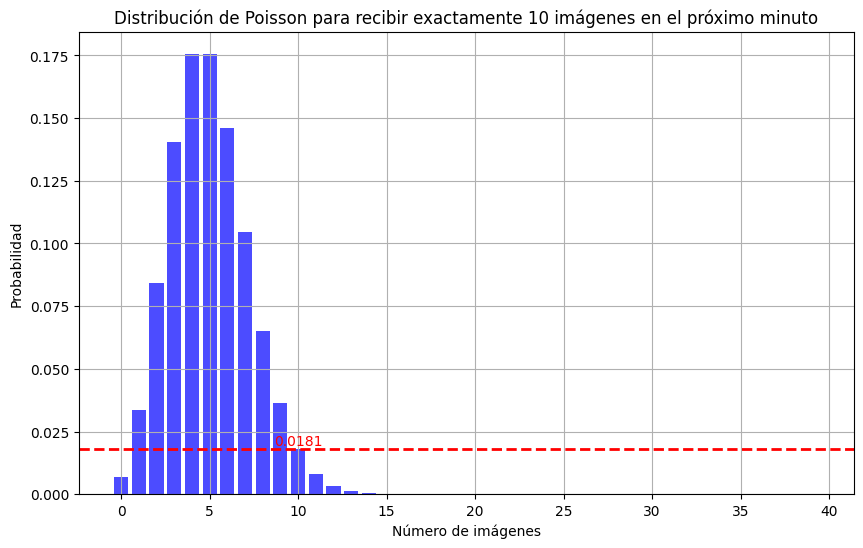

2. Probabilidad de recibir una imagen en el próximo minuto: 0.03368973499542734
3. Probabilidad de recibir al menos 30 imágenes en los próximos 5 minutos: 0.18210391597745512


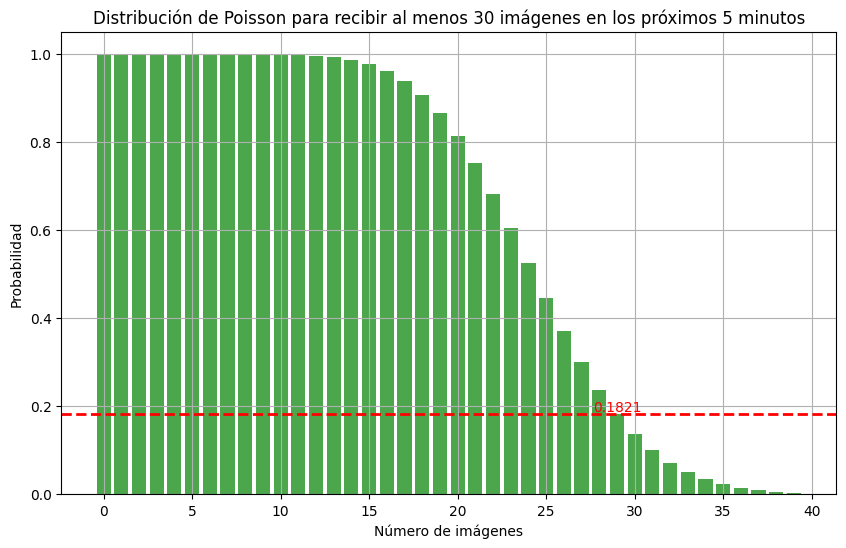

4. Probabilidad de recibir un total de 150 imágenes o más durante 30 minutos: 0.5108582297493597


In [26]:
def probabilidad_10_imagenes_en_proximo_minuto(tasa_promedio):
    """
    Calcula la probabilidad de recibir exactamente 10 imágenes en el próximo minuto.

    Parámetros:
    - tasa_promedio (float): Tasa promedio de llegada de imágenes.

    Retorna:
    float: La probabilidad de recibir exactamente 10 imágenes en el próximo minuto.
    """
    prob_10_imagenes = poisson.pmf(10, tasa_promedio)
    return prob_10_imagenes

def grafico_poisson_10_imagenes(tasa_promedio):
    """
    Genera un gráfico de la distribución de Poisson para recibir exactamente 10 imágenes en el próximo minuto.

    Parámetros:
    - tasa_promedio (float): Tasa promedio de llegada de imágenes.
    """
    x = np.arange(0, 40)
    prob_10_imagenes = poisson.pmf(x, tasa_promedio)
    
    plt.figure(figsize=(10, 6))
    plt.bar(x, prob_10_imagenes, color='blue', alpha=0.7)
    plt.title('Distribución de Poisson para recibir exactamente 10 imágenes en el próximo minuto')
    plt.xlabel('Número de imágenes')
    plt.ylabel('Probabilidad')
    plt.grid(True)
    
    plt.text(x[10], prob_10_imagenes[10], f'{prob_10_imagenes[10]:.4f}', ha='center', va='bottom', color='red')
    plt.axhline(y=prob_10_imagenes[10], color='red', linestyle='--', linewidth=2, label='y = 2')
    plt.show()

def probabilidad_1_imagen_en_proximo_minuto(tasa_promedio):
    """
    Calcula la probabilidad de recibir una imagen en el próximo minuto.

    Parámetros:
    - tasa_promedio (float): Tasa promedio de llegada de imágenes.

    Retorna:
    float: La probabilidad de recibir una imagen en el próximo minuto.
    """
    prob_1_imagen = poisson.pmf(1, tasa_promedio)
    return prob_1_imagen

def probabilidad_30_imagenes_proximos_5_minutos(tasa_promedio, tiempo_5_minutos):
    """
    Calcula la probabilidad de recibir al menos 30 imágenes en los próximos 5 minutos.

    Parámetros:
    - tasa_promedio (float): Tasa promedio de llegada de imágenes.
    - tiempo_5_minutos (int): Tiempo en minutos para el cual se calcula la probabilidad.

    Retorna:
    float: La probabilidad de recibir al menos 30 imágenes en los próximos 5 minutos.
    """
    prob_30_imagenes = 1 - poisson.cdf(29, tasa_promedio * tiempo_5_minutos)
    return prob_30_imagenes

def grafico_poisson_30_imagenes_proximos_5_minutos(tasa_promedio, tiempo_5_minutos):
    """
    Genera un gráfico de la distribución de Poisson para recibir al menos 30 imágenes en los próximos 5 minutos.

    Parámetros:
    - tasa_promedio (float): Tasa promedio de llegada de imágenes.
    - tiempo_5_minutos (int): Tiempo en minutos para el cual se calcula la probabilidad.
    """
    x = np.arange(0, 40)
    prob_30_imagenes = 1 - poisson.cdf(x, tasa_promedio * tiempo_5_minutos)
    
    plt.figure(figsize=(10, 6))
    plt.bar(x, prob_30_imagenes, color='green', alpha=0.7)
    plt.title('Distribución de Poisson para recibir al menos 30 imágenes en los próximos 5 minutos')
    plt.xlabel('Número de imágenes')
    plt.ylabel('Probabilidad')
    plt.text(x[29], prob_30_imagenes[29], f'{prob_30_imagenes[29]:.4f}', ha='center', va='bottom', color='red')
    plt.grid(True)
    plt.axhline(y=prob_30_imagenes[29], color='red', linestyle='--', linewidth=2, label='y = 2')
    plt.show()

def probabilidad_150_imagenes_30_minutos(total_imagenes_30_minutos, tasa_promedio, tiempo_30_minutos):
    """
    Calcula la probabilidad de recibir un total de 150 imágenes o más durante 30 minutos.

    Parámetros:
    - total_imagenes_30_minutos (int): Total de imágenes en 30 minutos.
    - tasa_promedio (float): Tasa promedio de llegada de imágenes.
    - tiempo_30_minutos (int): Duración de 30 minutos.

    Retorna:
    float: La probabilidad de recibir un total de 150 imágenes o más durante 30 minutos.
    """
    prob_150_imagenes = 1 - poisson.cdf(total_imagenes_30_minutos - 1, tasa_promedio * tiempo_30_minutos)
    return prob_150_imagenes

# Parámetros del problema
tasa_promedio = 5
tiempo_5_minutos = 5
tiempo_30_minutos = 30
total_imagenes_30_minutos = 150

# Outputs
print("1. Probabilidad de recibir exactamente 10 imágenes en el próximo minuto:", probabilidad_10_imagenes_en_proximo_minuto(tasa_promedio))
grafico_poisson_10_imagenes(tasa_promedio)

print("2. Probabilidad de recibir una imagen en el próximo minuto:", probabilidad_1_imagen_en_proximo_minuto(tasa_promedio))

print("3. Probabilidad de recibir al menos 30 imágenes en los próximos 5 minutos:", probabilidad_30_imagenes_proximos_5_minutos(tasa_promedio, tiempo_5_minutos))
grafico_poisson_30_imagenes_proximos_5_minutos(tasa_promedio, tiempo_5_minutos)

print("4. Probabilidad de recibir un total de 150 imágenes o más durante 30 minutos:", probabilidad_150_imagenes_30_minutos(total_imagenes_30_minutos, tasa_promedio, tiempo_30_minutos))

----

#### PREGUNTA 3

La duración de la gestación humana se aproxima bien mediante una distribución normal con una media µ = 280 días y una desviación estándar σ = 8,5 días.

##### 1.  Realice graficas correspondiente a la función de densidad de probabilidad (pdf) y a la función de distribución acumulativa (cdf)

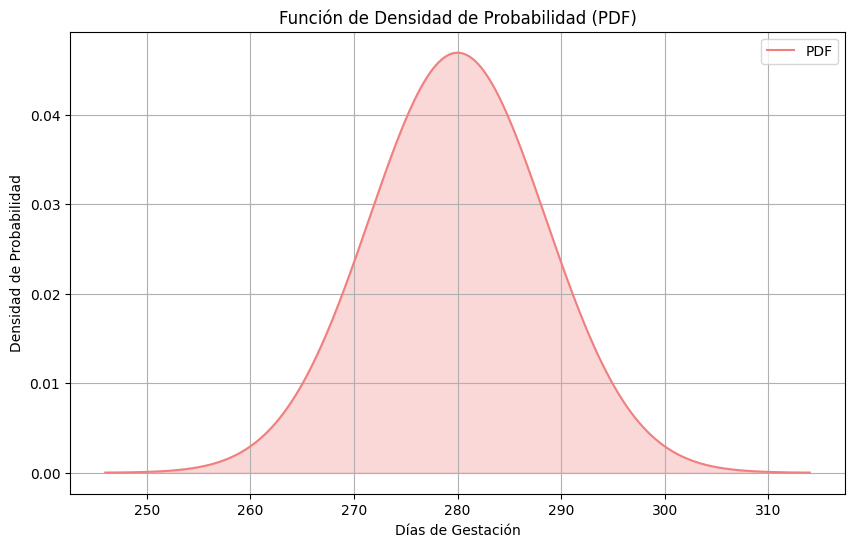

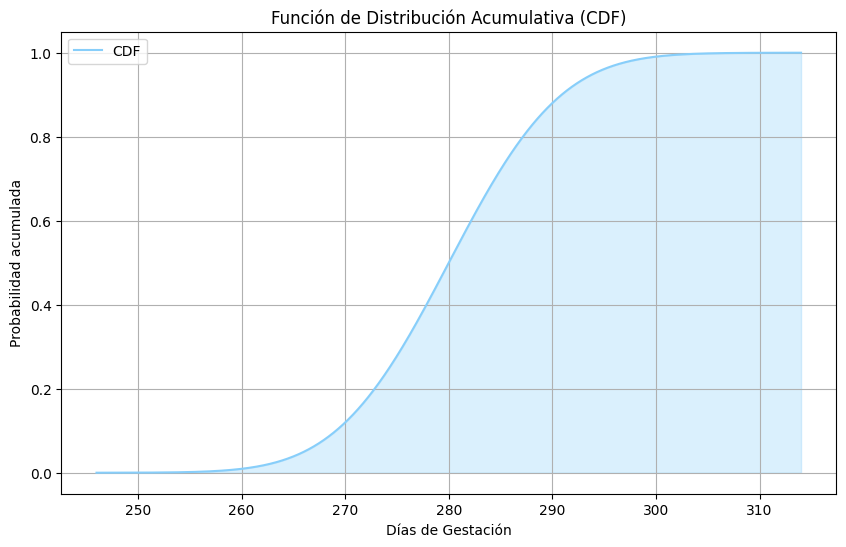

In [27]:

def generar_distribucion_normal(mu, sigma):
    """
    Genera una distribución normal.

    Parámetros:
    mu (float): Media de la distribución.
    sigma (float): Desviación estándar de la distribución.

    Retorna:
    x (array): Valores del rango.
    pdf (array): Función de densidad de probabilidad.
    cdf (array): Función de distribución acumulativa.
    """
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    pdf = norm.pdf(x, mu, sigma)
    cdf = norm.cdf(x, mu, sigma)
    return x, pdf, cdf

def graficar_funcion(x, y, titulo, xlabel, ylabel, label, colorElegido):
    """
    Grafica una función.

    Parámetros:
    x (array): Valores en el eje x.
    y (array): Valores en el eje y.
    titulo (str): Título del gráfico.
    xlabel (str): Etiqueta del eje x.
    ylabel (str): Etiqueta del eje y.
    label (str): Etiqueta de la función.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=label, color=colorElegido)  # Color azul para las funciones
    plt.fill_between(x, y, color=colorElegido, alpha=0.3)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar

# Generar distribución normal
x, pdf, cdf = generar_distribucion_normal(mu, sigma)

# Graficar la función de densidad de probabilidad (PDF)
graficar_funcion(x, pdf, 'Función de Densidad de Probabilidad (PDF)', 'Días de Gestación', 'Densidad de Probabilidad', 'PDF', 'lightcoral')

# Graficar la función de distribución acumulativa (CDF)
graficar_funcion(x, cdf, 'Función de Distribución Acumulativa (CDF)', 'Días de Gestación', 'Probabilidad acumulada', 'CDF', 'lightskyblue')

##### 2.  Supongamos que tienes un examen final que está programado para el 19 de abril y tu profesora embarazada tiene una fecha de parto prevista para el 24 de abril. Encuentre la probabilidad de que dé a luz el mismo día del examen final o antes.

La probabilidad de que la profesora dé a luz antes o el día del examen final es: 27.82%


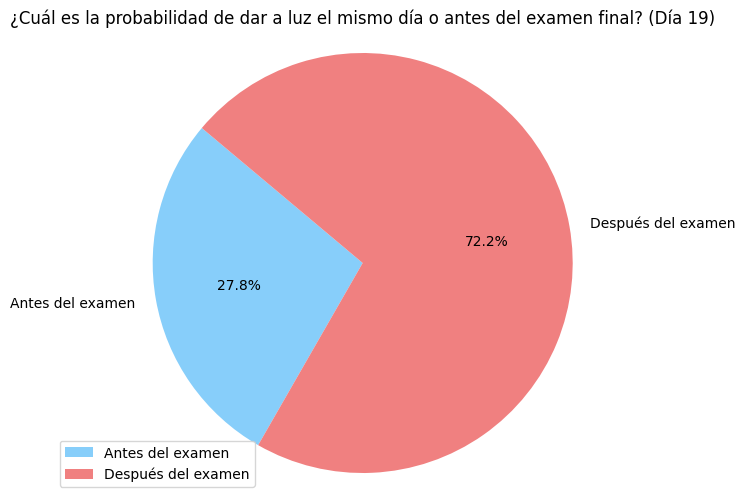

In [28]:
def P_partoantesoeldiadelexamen(mu: float, sigma: float) -> float:
    """
    Calcula la probabilidad de que la profesora dé a luz el mismo día del examen final o antes.

    Args:
        mu (float): Media de la distribución normal.
        sigma (float): Desviación estándar de la distribución normal.

    Returns:
        float: Probabilidad de parto el mismo día o antes del examen final en forma de porcentaje.
    """
    # Calcular la probabilidad de que la profesora dé a luz en o antes de 275 días de gestación
    dia_parto_anticipado = 275  # 280 días - 5 días antes
    probabilidad_antes_examen = norm.cdf(dia_parto_anticipado, mu, sigma)

    return probabilidad_antes_examen

def graficar_probabilidad(probabilidad: float, fecha_examen: int):
    """
    Genera una gráfica de torta que muestra la probabilidad de parto antes o el mismo día del examen final.

    Args:
        probabilidad (float): Probabilidad de parto antes o el mismo día del examen final en forma de porcentaje.
        fecha_examen (int): Día del examen final.
    """
    # Calcular el porcentaje restante para representar la probabilidad de no dar a luz antes del examen
    probabilidad *= 100
    probabilidad_no_parto = 100 - probabilidad

    # Etiquetas para la gráfica
    etiquetas = ['Antes del examen', 'Después del examen']
    
    # Datos para la gráfica
    valores = [probabilidad, probabilidad_no_parto]

    # Crear la gráfica de torta
    plt.figure(figsize=(8, 6))
    colores = ['lightskyblue', 'lightcoral']
    plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
    plt.legend(loc="lower left", labels=etiquetas)
    plt.title('¿Cuál es la probabilidad de dar a luz el mismo día o antes del examen final? (Día {})'.format(fecha_examen))
    plt.axis('equal')
    plt.show()

# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar
fecha_examen = 19  # Día del examen final

# Calcular P para el parto antes del examen final
probabilidad_antes = P_partoantesoeldiadelexamen(mu, sigma)

print("La probabilidad de que la profesora dé a luz antes o el día del examen final es: {:.2f}%".format(probabilidad_antes*100))

# Generar la gráfica de torta
graficar_probabilidad(probabilidad_antes, fecha_examen)


##### 3.  Encuentre la probabilidad de que dé a luz en abril después del examen.

Por esto entendemos que el rango por el que nos piden hallar la probabilidad de dar a luz se comprende entre el día 20 y 30 de abril = [20,30]

La probabilidad que de a luz despues del examen en abril: 44.09%


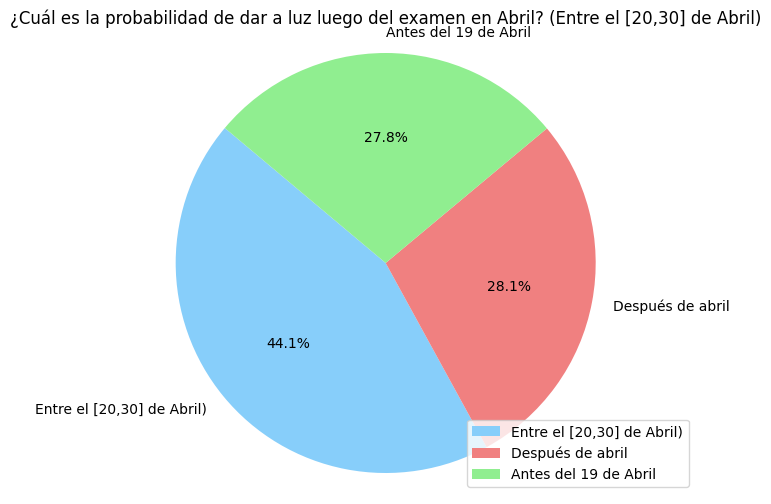

In [29]:
# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar
# Días de gestación entre el 20 de abril y 30 de abril
dias_despues_examen_inicio = 276  # 280 + (20 - 24)
dias_despues_examen_final = 286  # 280 + (30 - 24)

def P_partodespuesexamen(mu: float, sigma: float) -> float:
    """
    Calcula la probabilidad de que la profesora dé a luz después del examen final pero antes de que se acabe abril.
    """
    P_despues_examen = norm.cdf(dias_despues_examen_final, mu, sigma) - norm.cdf(dias_despues_examen_inicio, mu, sigma)
    print("La probabilidad que de a luz despues del examen en abril: {:.2f}%".format(P_despues_examen*100))
    return P_despues_examen

def graficar_probabilidad(probabilidad: float, probabilidad_antes: float):
    """
    Genera una gráfica de torta que muestra la probabilidad de parto después del examen en Abril.

    Args:
        probabilidad (float): Probabilidad de parto antes o el mismo día del examen final en forma de porcentaje.
    """
    # Calcular el porcentaje restante para representar la probabilidad de no dar a luz antes del examen
    probabilidad *= 100
    probabilidad_antes *= 100
    probabilidad_despues_abril = 100- (probabilidad+probabilidad_antes)

    # Etiquetas para la gráfica
    etiquetas = ['Entre el [20,30] de Abril)', 'Después de abril', 'Antes del 19 de Abril']
    
    # Datos para la gráfica
    valores = [probabilidad, probabilidad_despues_abril, probabilidad_antes]

    # Crear la gráfica de torta
    plt.figure(figsize=(8, 6))
    colores = ['lightskyblue', 'lightcoral', 'lightgreen']
    plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
    plt.legend(loc="lower right", labels=etiquetas)
    plt.title('¿Cuál es la probabilidad de dar a luz luego del examen en Abril? (Entre el [20,30] de Abril)')
    plt.axis('equal')
    plt.show()
    
probabilidad_despues = P_partodespuesexamen(mu, sigma)

graficar_probabilidad(probabilidad_despues,probabilidad_antes)


##### 4.  La profesora decide adelantar la fecha del examen para que haya un 95 % de probabilidad de que dé a luz después del examen. ¿Qué fecha debería elegir?

In [30]:
# Datos del problema
mu = 280  # media en días
sigma = 8.5  # desviación estándar en días

# Calcular el día de gestación que corresponde al percentil 5
dias_gestacion_percentil_5 = norm.ppf(0.05, mu, sigma)

# Convertir este día de gestación en una fecha respecto al 24 de abril (fecha de parto estimada)
# Si el día de gestación es menor que 280, calcular cuántos días antes del 24 de abril ocurre
dias_antes_parto = dias_gestacion_percentil_5 - 280
nueva_fecha_examen = 24 + dias_antes_parto  # Día del mes de abril
print("Para que la probabilidad de que la profesora de a luz antes del examen sea del 5%")
print(f"El examen debe ser reagendado para el: {int(nueva_fecha_examen)} de abril")

Para que la probabilidad de que la profesora de a luz antes del examen sea del 5%
El examen debe ser reagendado para el: 10 de abril


----

#### PREGUNTA 4

El archivo Web Server Requests G contiene un conjunto de datos que proporciona un registro histórico (sintético) de la tasa de llegada de solicitudes que un servidor web ha experimentado durante un intervalo de tiempo de 5 minutos. Esta información es esencial para comprender y gestionar la carga del servidor, planificar la infraestructura, y garantizar un rendimiento óptimo
en un entorno de servidor web real.
1. Identificar patrones de tráfico web como horas pico de actividad y momentos de menor demanda.
2. Ajuste una distribución gamma a sus datos de “Arrival Rate”, trace el histograma de sus datos junto con la función de densidad de probabilidad (pdf) de la distribución gamma ajustada y muestre los parámetros de la distribución gamma ajustada.
3. ¿Cuál es la probabilidad de que el servidor reciba más de 8 solicitudes durante el próximo intervalo?
4. ¿Cuál es la probabilidad de que la tasa de llegada supere un umbral crítico de, por ejemplo, 15 solicitudes por minuto, en el próximo intervalo?
5. Si la capacidad máxima de procesamiento del servidor es de 25 solicitudes por intervalo, ¿Cuál la probabilidad de superar la capacidad máxima de procesamiento del servidor en el siguiente intervalo?

##### Identificación de patrones de tráfico web

Para realizar un correcto análisis, generamos más columnas para el dataframe dado que existía más información detrás de la marca temporal de cada 5 minutos, con esta logramos identificar las horas, días y meses para poder hacer un análisis más apropiado.

¿Cómo llegamos a esto?

Si cada registro se tomó en un lapso de 5 minutos eso significa que
* 1 registro = 5 minutos
* 12 registros = 1 hora
* 288 registros = 1 día
* 8640 registros = 1 mes

Teniendo esta información, podemos realizar análisis de tráfico en diferentes marcas temporales (horas al día y días a la semana, meses al año)

In [31]:
def rename_timestamp_column(df):
    """
    Renames the 'Timestamp' column to 'Minute'.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame with renamed column.
    """
    return df.rename(columns={'Timestamp': 'Minute'})

def calculate_hour_column(df):
    """
    Calculates the 'Hour' column based on the index.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame with 'Hour' column inserted.
    """
    df['Hour'] = (df.index // 12) % 24
    return df

def assign_weekday(df):
    """
    Assigns weekday to each row in the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame with 'Day' column inserted.
    """
    dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    contador_dia = 0

    def asignar_dia(row_index):
        nonlocal contador_dia
        if row_index % 288 == 0:
            dia = dias_semana[contador_dia]
            contador_dia = (contador_dia + 1) % len(dias_semana)
            return dia
        else:
            return None

    df['Day'] = [asignar_dia(index) for index, _ in df.iterrows()]
    df['Day'] = df['Day'].ffill()
    return df

def assign_month(df):
    """
    Assigns weekday to each row in the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame with 'Month' column inserted.
    """
    meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    contador_mes = 0

    def asignar_mes(row_index):
        nonlocal contador_mes
        if row_index % 8640 == 0:
            mes = meses[contador_mes]
            contador_mes = (contador_mes + 1) % len(meses)
            return mes
        else:
            return None

    df['Month'] = [asignar_mes(index) for index, _ in df.iterrows()]
    df['Month'] = df['Month'].ffill()
    return df

def organize_columns(df):
    """
    Organizes the columns of the DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: DataFrame with organized columns.
    """
    df['Hour'] = df['Hour'].astype(int)
    df = df[['Month','Day', 'Hour', 'Minute', 'Arrival_Rate']]
    return df

# ARREGLO DEL DATASET
df = rename_timestamp_column(df)
df = calculate_hour_column(df)
df = assign_weekday(df)
df = assign_month(df)
df = organize_columns(df)

# Print DataFrame columns
print("Ahora contamos con las siguientes nuevas columnas:",df.columns)
print("Puedes ver el nuevo archivo en la carpeta './data/output/'")

# Save the DataFrame to a new CSV file
df.to_csv('./data/output/Web_Server_Requests_G_(With_time_frames).csv', index=False)


Ahora contamos con las siguientes nuevas columnas: Index(['Month', 'Day', 'Hour', 'Minute', 'Arrival_Rate'], dtype='object')
Puedes ver el nuevo archivo en la carpeta './data/output/'


##### ¿Cuál es el promedio de la tasa de llegada de solicitudes para cada hora del día?

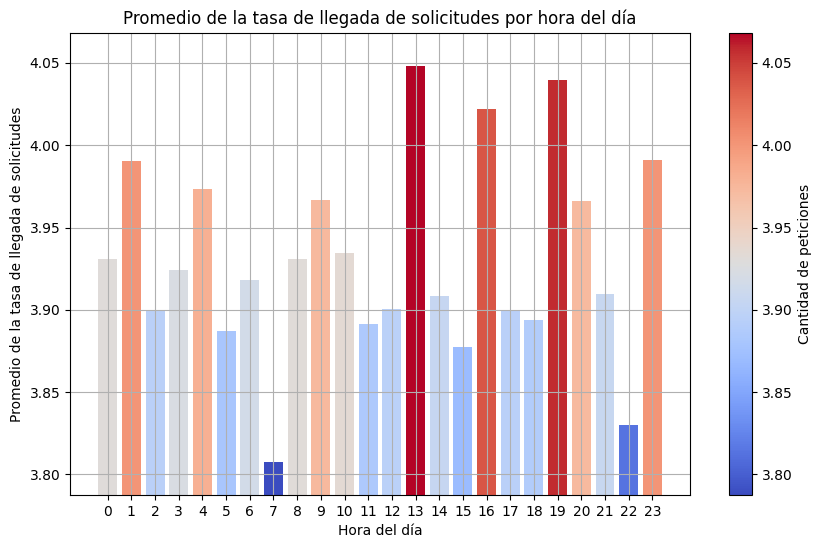

In [32]:
# Calcular la mediana de la tasa de llegada de solicitudes para cada hora del día
mean_request_rate_by_hour = df.groupby('Hour')['Arrival_Rate'].mean()

# Definir una escala de colores que vaya de azul a rojo, basada en los valores de la altura de las barras
colors = plt.cm.coolwarm((mean_request_rate_by_hour - mean_request_rate_by_hour.min()) / (mean_request_rate_by_hour.max() - mean_request_rate_by_hour.min()))

# Crear el gráfico de barras con colores graduales
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(mean_request_rate_by_hour.index, mean_request_rate_by_hour.values, color=colors)

# Añadir título y etiquetas
ax.set_title('Promedio de la tasa de llegada de solicitudes por hora del día')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Promedio de la tasa de llegada de solicitudes')
ax.set_xticks(range(24))
ax.grid(True)

# Establecer los límites del eje según el rango de los datos en el eje y
min_limit = mean_request_rate_by_hour.min() - 0.02
max_limit = mean_request_rate_by_hour.max() + 0.02
plt.ylim(min_limit, max_limit)

# Añadir una barra de colores como leyenda en el eje y
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=min_limit, vmax=max_limit))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Cantidad de peticiones')

plt.show()

##### ¿Cuál es el promedio de la tasa de llegada de solicitudes para cada día de la semana?

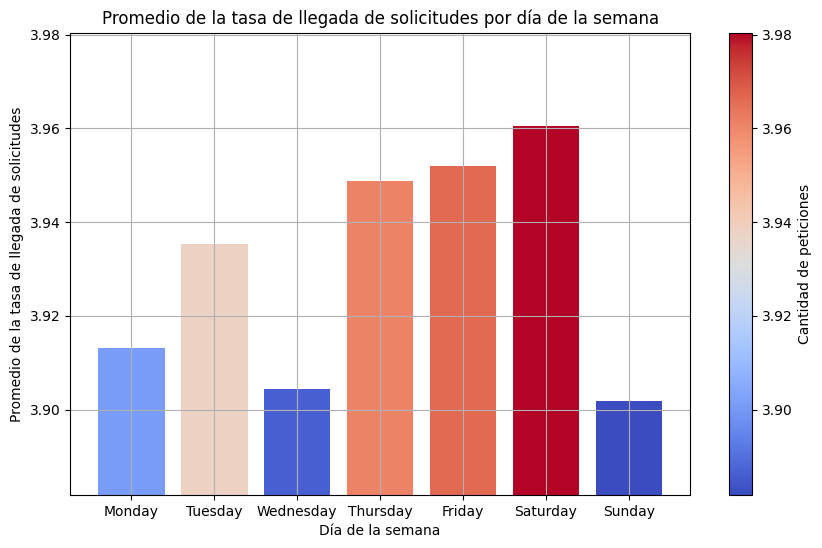

In [33]:
# Calcular la mediana de la tasa de llegada de solicitudes para cada día de la semana
mean_request_rate_by_day = df.groupby('Day')['Arrival_Rate'].mean()

# Definir el orden de los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordenar los datos de la mediana de acuerdo al orden de los días de la semana
mean_request_rate_by_day = mean_request_rate_by_day.reindex(dias_ordenados)

# Definir una escala de colores que vaya de azul a rojo, basada en los valores de la altura de las barras
colors = plt.cm.coolwarm((mean_request_rate_by_day - mean_request_rate_by_day.min()) / (mean_request_rate_by_day.max() - mean_request_rate_by_day.min()))

# Crear el gráfico de barras con colores graduales
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(np.arange(len(dias_ordenados)), mean_request_rate_by_day.values, color=colors)

# Añadir título y etiquetas
ax.set_title('Promedio de la tasa de llegada de solicitudes por día de la semana')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Promedio de la tasa de llegada de solicitudes')
ax.set_xticks(np.arange(len(dias_ordenados)))
ax.set_xticklabels(dias_ordenados)
ax.grid(True)

# Establecer los límites del eje según el rango de los datos en el eje y
min_limit = mean_request_rate_by_day.min() - 0.02
max_limit = mean_request_rate_by_day.max() + 0.02
plt.ylim(min_limit, max_limit)

# Añadir una barra de colores como leyenda en el eje y
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=min_limit, vmax=max_limit))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Cantidad de peticiones')

plt.show()


##### ¿Cuál es el promedio de la tasa de llegada de solicitudes para cada mes del año?

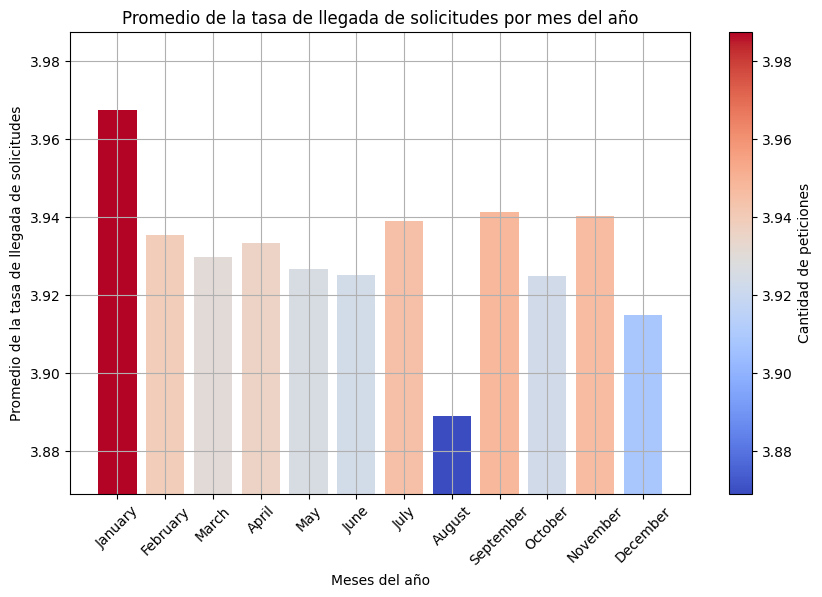

In [34]:
df2 = df.iloc[0:103682] #Vamos a tomar los registros sólo del primer año para hacer el gráfico

# Calcular la mediana de la tasa de llegada de solicitudes para cada día de la semana
mean_request_rate_by_day = df2.groupby('Month')['Arrival_Rate'].mean()

# Definir el orden de los días de la semana
meses_ordenados = meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reordenar los datos de la mediana de acuerdo al orden de los días de la semana
mean_request_rate_by_day = mean_request_rate_by_day.reindex(meses_ordenados)

# Definir una escala de colores que vaya de azul a rojo, basada en los valores de la altura de las barras
colors = plt.cm.coolwarm((mean_request_rate_by_day - mean_request_rate_by_day.min()) / (mean_request_rate_by_day.max() - mean_request_rate_by_day.min()))

# Crear el gráfico de barras con colores graduales
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(np.arange(len(meses_ordenados)), mean_request_rate_by_day.values, color=colors)

# Añadir título y etiquetas
ax.set_title('Promedio de la tasa de llegada de solicitudes por mes del año')
ax.set_xlabel('Meses del año')
ax.set_ylabel('Promedio de la tasa de llegada de solicitudes')
ax.set_xticks(np.arange(len(meses_ordenados)))
ax.set_xticklabels(meses_ordenados, rotation=45)
ax.grid(True)

# Establecer los límites del eje según el rango de los datos en el eje y
min_limit = mean_request_rate_by_day.min() - 0.02
max_limit = mean_request_rate_by_day.max() + 0.02
plt.ylim(min_limit, max_limit)

# Añadir una barra de colores como leyenda en el eje y
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=min_limit, vmax=max_limit))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Cantidad de peticiones')

plt.show()

----

##### Distribución Gamma y cálculo de probabilidades

2. Parámetros de la distribución gamma ajustada:
+-------------+--------------+
| Parameter   |        Value |
+=============+==============+
| Shape       |  1.28632     |
+-------------+--------------+
| Loc         | -0.000102199 |
+-------------+--------------+
| Scale       |  3.05596     |
+-------------+--------------+


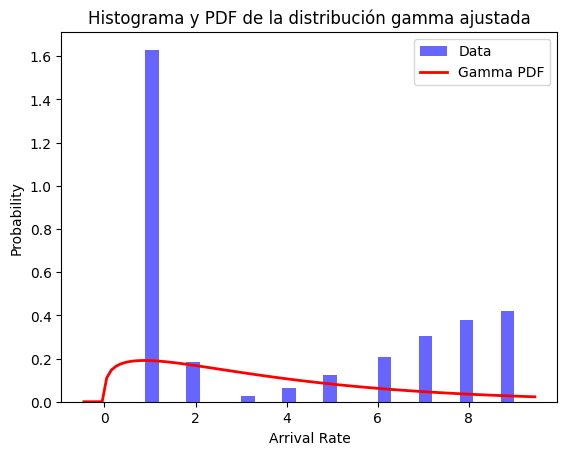

3. Probabilidad de recibir más de 8 solicitudes: 11.64%
4. Probabilidad de que la tasa de llegada supere 15 solicitudes/minuto: 1.36%
5. Probabilidad de superar la capacidad máxima de procesamiento del servidor: 0.06%


In [35]:
def ajustar_distribucion_gamma(datos):
    """
    Ajusta una distribución gamma a los datos.

    Parámetros:
        datos (pandas.Series): La serie de datos para ajustar la distribución gamma.

    Retorna:
        tuple: Los parámetros de la distribución gamma ajustada (shape, loc, scale).
    """
    return gamma.fit(datos)

def plotear_histograma_y_pdf(datos, shape, loc, scale):
    """
    Plotea el histograma de los datos junto con la PDF de la distribución gamma ajustada.

    Parámetros:
        datos (pandas.Series): La serie de datos para plotear.
        shape (float): Parámetro de forma de la distribución gamma.
        loc (float): Parámetro de locación de la distribución gamma.
        scale (float): Parámetro de escala de la distribución gamma.
    """
    plt.hist(datos, bins=30, density=True, alpha=0.6, color='b', label='Data')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = gamma.pdf(x, shape, loc, scale)
    plt.plot(x, p, linewidth=2, label='Gamma PDF',color='red')
    plt.legend()
    plt.xlabel('Arrival Rate')
    plt.ylabel('Probability')
    plt.title('Histograma y PDF de la distribución gamma ajustada')
    plt.show()

def calcular_probabilidad_mas_solicitudes(dato_umbral, shape, loc, scale):
    """
    Calcula la probabilidad de recibir más de un cierto número de solicitudes.

    Parámetros:
        dato_umbral (float): El umbral de solicitudes.
        shape (float): Parámetro de forma de la distribución gamma.
        loc (float): Parámetro de locación de la distribución gamma.
        scale (float): Parámetro de escala de la distribución gamma.

    Retorna:
        float: La probabilidad de recibir más de `dato_umbral` solicitudes.
    """
    return 1 - gamma.cdf(dato_umbral, shape, loc, scale)


# Ajuste de la distribución gamma
shape, loc, scale = ajustar_distribucion_gamma(df['Arrival_Rate'])
print("2. Parámetros de la distribución gamma ajustada:")
print(tabulate([['Shape', shape], ['Loc', loc], ['Scale', scale]], headers=['Parameter', 'Value'], tablefmt='grid'))

# Plotear el histograma junto con la PDF de la distribución gamma ajustada
plotear_histograma_y_pdf(df['Arrival_Rate'], shape, loc, scale)

# Probabilidad de que el servidor reciba más de 8 solicitudes durante el próximo intervalo
prob_c = calcular_probabilidad_mas_solicitudes(8, shape, loc, scale)
print("3. Probabilidad de recibir más de 8 solicitudes: {:.2f}%".format(prob_c*100))

# Probabilidad de que la tasa de llegada supere un umbral crítico de 15 solicitudes por minuto en el próximo intervalo
prob_d = calcular_probabilidad_mas_solicitudes(15, shape, loc, scale)
print("4. Probabilidad de que la tasa de llegada supere 15 solicitudes/minuto: {:.2f}%".format(prob_d*100))

# Probabilidad de superar la capacidad máxima de procesamiento del servidor (25 solicitudes por intervalo) en el siguiente intervalo
prob_e = calcular_probabilidad_mas_solicitudes(25, shape, loc, scale)
print("5. Probabilidad de superar la capacidad máxima de procesamiento del servidor: {:.2f}%".format(prob_e*100))


----